<a href="https://colab.research.google.com/github/bogicho/FlyAI-5/blob/main/Day6_ML_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANN MNIST

In [12]:
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
model.fit(x_train, y_train, epochs=5)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2002 - accuracy: 0.9411
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0818 - accuracy: 0.9751
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0536 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0358 - accuracy: 0.9882
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0673 - accuracy: 0.9796
테스트 정확도: 0.9796000123023987


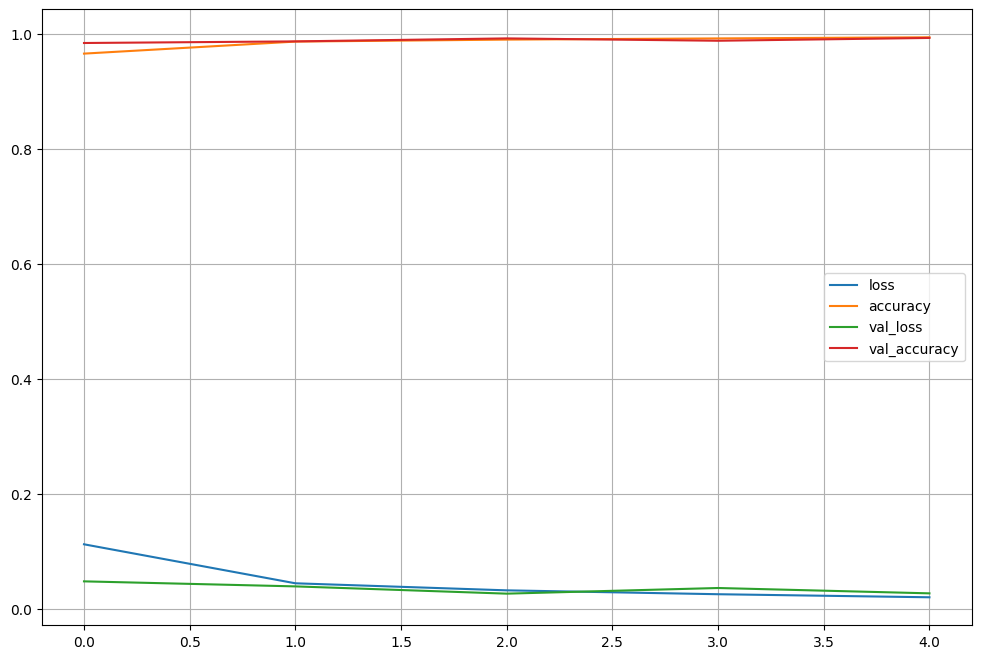

In [13]:
#7. 그래프로보기
import matplotlib.pyplot as plt

plot_target = ['loss' , 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [14]:
#8. 테스트

score = model.evaluate(x_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0673 - accuracy: 0.9796
Test Loss : 0.0673462301492691
Test Accuracy  : 0.9796000123023987


In [15]:
#9. 데이터 예측

import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result,  axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [16]:
#10. 틀린데이터 수 확인

wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

204

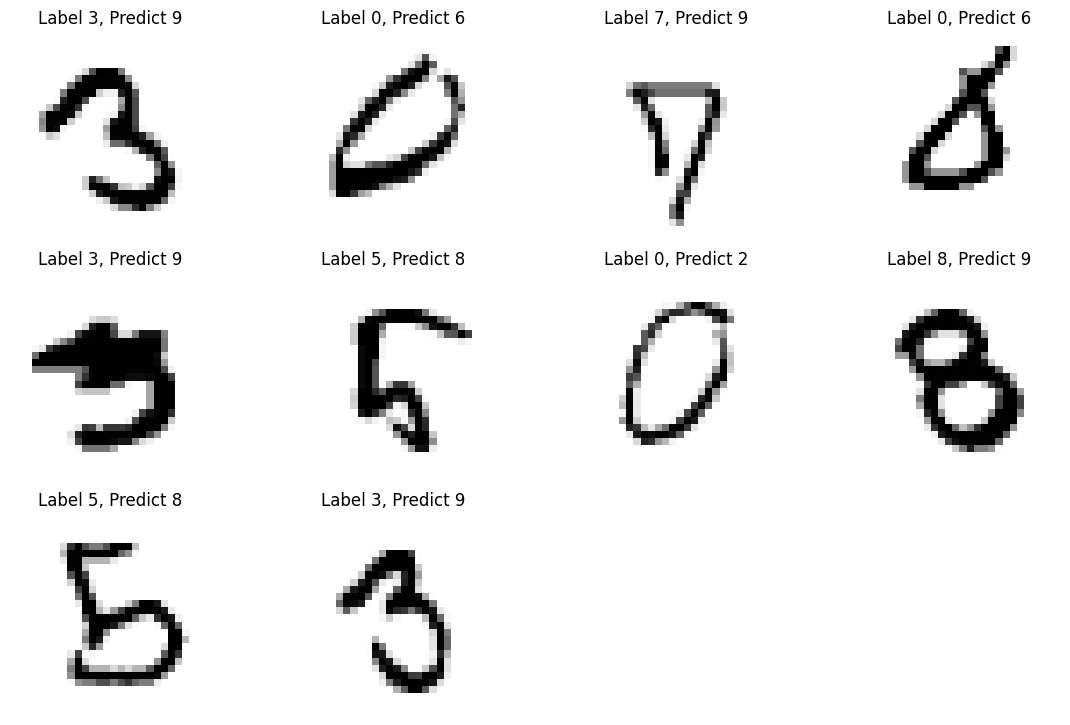

In [18]:
#11. 틀린데이터 10개 그려보기

import random

samples = random.choices(population=wrong_result, k =10)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(x_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label ' + str(y_test[n]) + ', Predict ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

In [19]:
# 12. 모델 저장
model.save('MNIST_ANN_model.h5')

#CNN MNIST

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time #모델 컴파일 시간 확인

#1. 데이터 불러오기
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28 ,28, 1))
X_test = X_test.reshape((10000, 28 ,28, 1))

#2. 모델구성
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5),
                  strides=(1, 1),
                  padding='same',
                  activation='relu',
                  input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

#3. 모델컴파일
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
start_time = time.time()

#4. 모델 훈련
hist = model.fit(X_train, y_train,
                 epochs=5,
                 verbose = 1,
                 validation_data=(X_test, y_test))
print(f'Fit Time :{time.time() - start_time}')

#5. 모델 정확도
test_loss, test_acc = model.evaluate(X_test, y_test)
print('테스트 정확도:', test_acc)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

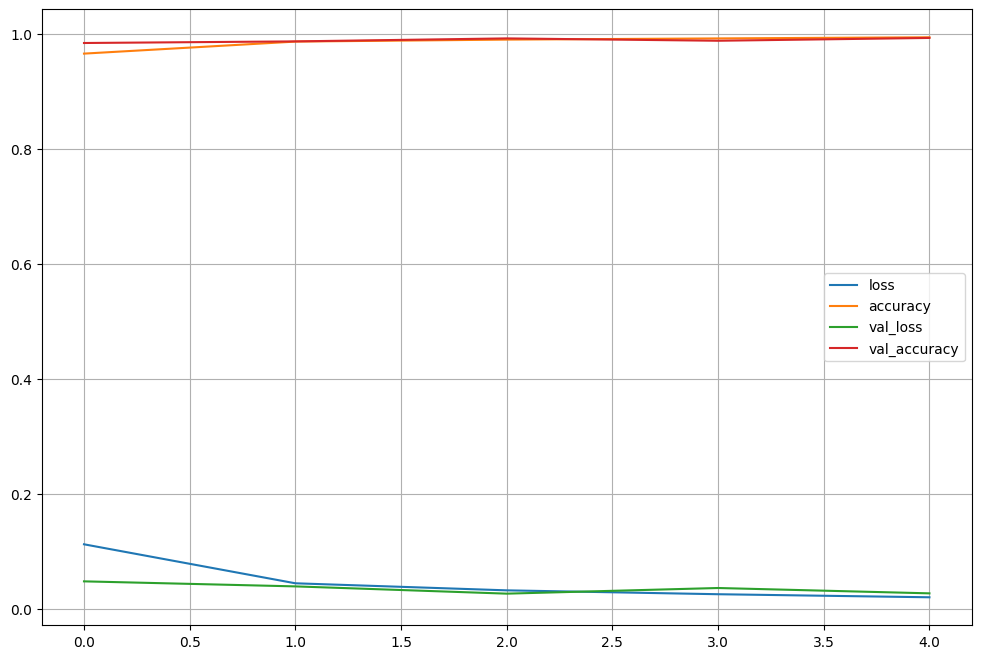

In [6]:
#6. 그래프로 출력

import matplotlib.pyplot as plt

plot_target = ['loss' , 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [7]:
#7. 테스트

score = model.evaluate(X_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

313/313 [==============================] - 6s 18ms/step - loss: 0.0264 - accuracy: 0.9926
Test Loss : 0.026409780606627464
Test Accuracy  : 0.9926000237464905


In [8]:
#8. 데이터 예측
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result,  axis=1)
predicted_labels[:10]

313/313 [==============================] - 6s 20ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [9]:
#9. 틀린 데이터만 모으기
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

74

##총 1만개 데이터 중에 74개를 틀림

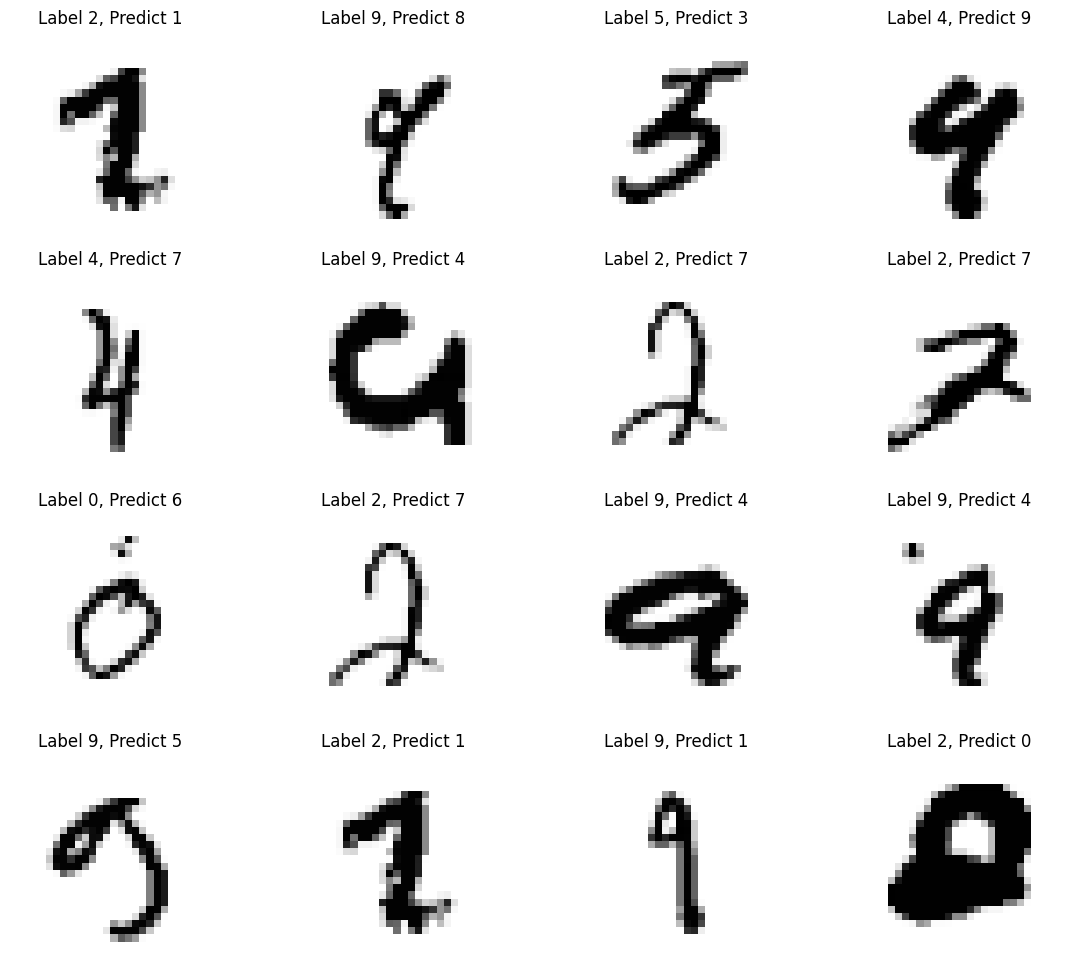

In [10]:
#10. 틀린 데이터 16개만 직접 그려보기
import random

samples = random.choices(population=wrong_result, k =16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label ' + str(y_test[n]) + ', Predict ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

In [20]:
#11. Model Save
model.save('MNIST_CNN_model.h5')

# 2. fashion-MNIST
- 70,000개의 흑백이미지로 구성
- 각 이미지는 (28,28) 2차원 텐서로 구성
- 흑백이미지(채널에 해당하는 차원은 없음)
- 라벨정보는 각각의 이미지의 범주에 해당하는 id정보로 0-9 정수로 구성
    - 0 : T-shirt/top
    - 1 : Trouser
    - 2 : Pullover
    - 3 : Dress
    - 4 : Coat
    - 5 : Sandal
    - 6 : Shirt
    - 7 : Sneaker
    - 8 : Bag
    - 9 : Ankel boot
- 처리과정
  - 전처리
    - 데이터 셋 분리(학습/테스트)
    - 데이터 전처리(scaling/형변환/원핫인코딩)
    - 학습/검증 데이터 분리
   - 학습, 검증, 테스트 데이터셋 생성
  -모델링
    - 모델생성
    - 모델학습
  - 모델 성능평가
    - dropout
  - 시각화

In [2]:
#1. 데이터불러오기
import tensorflow as tf
from tensorflow import keras
import keras.datasets as d
import numpy as np
from tensorflow.keras.utils import to_categorical

fmnist = keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = fmnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


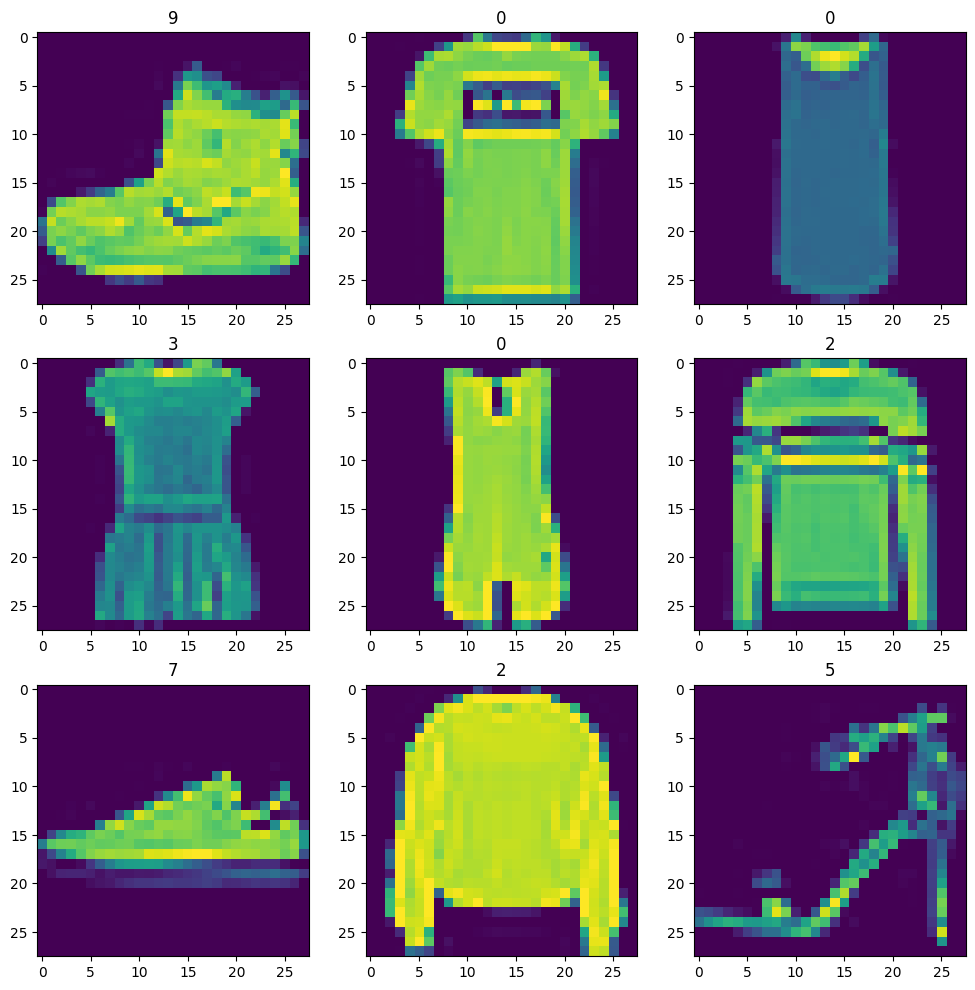

In [3]:
#1-1 데이터 확인(9장 시각화)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title(y_train[i])
    plt.imshow(X_train[i])


In [4]:
#2. 데이터 전처리
#데이터 정규화 (0-255)

X_train2 = X_train[:,:,:,np.newaxis] #차원 증가(3차원으로, reshape의 효과)
X_test2 = X_test[:,:,:,np.newaxis]

X_train2 = X_train2/255
X_test2 = X_test2/255

In [5]:
#3. data 분리

y_train2 = to_categorical(y_train,10)
y_test2 = to_categorical(y_test,10)

In [6]:
#4. 모델 생성

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

model = Sequential()
model.add(Conv2D(filters = 32,
                 kernel_size=(3,3),
                 strides=(1,1),padding='Same',
                 activation = 'relu',
                 input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='Same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='Same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = 'softmax'))

> fashion mnist data는 mnist에 비해 이미지의 특징적인 것들이 많으므로 Conv2D -> maxpooling을 반복하면서 노이즈를 제거했다. Flatten, FC layer들을 거치고 Dropout을 시켜 모델을 생성


In [7]:
#5. 모델 컴파일

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 32)          0

In [10]:
hist = model.fit(X_train2,y_train2,
                 epochs = 5 ,
                 batch_size = 100,
                 verbose=2)
loss,acc = model.evaluate(X_test2,y_test2)
print('loss:', round(loss,3))
print('accurate:', round(acc,3))

Epoch 1/5
600/600 - 86s - loss: 0.2733 - accuracy: 0.9042 - 86s/epoch - 144ms/step
Epoch 2/5
600/600 - 95s - loss: 0.2605 - accuracy: 0.9116 - 95s/epoch - 158ms/step
Epoch 3/5
600/600 - 97s - loss: 0.2367 - accuracy: 0.9175 - 97s/epoch - 162ms/step
Epoch 4/5
600/600 - 81s - loss: 0.2264 - accuracy: 0.9207 - 81s/epoch - 135ms/step
Epoch 5/5
600/600 - 88s - loss: 0.2111 - accuracy: 0.9257 - 88s/epoch - 146ms/step
313/313 [==============================] - 11s 36ms/step - loss: 0.2568 - accuracy: 0.9086
loss: 0.257
accurate: 0.909


# CIFAR10 CNN(keras)
- 이미지 크기 정규화
- 0-1 사이값이 되도록 정규화(원래이미지 0-255)
  - conv-conv-pool-dense
  - conv-conv-pool-dense
  - conv-pool-dense
  - conv-pool-dense
  -flaten
  -dense-dropout
  -dense-dropout



In [12]:
#1. 데이터로딩(케라스)
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [13]:
#2. 데이터 전처리
#이미지정규화(0~255 데이터를 0~1로 정규화)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [15]:
#3. 원핫인코딩하기
import keras
from keras.utils import to_categorical

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [16]:
#4. 훈련데이터, 검증데이터 분류
(x_train, x_val) = x_train[5000:], x_train[:5000]
(y_train, y_val) = y_train[5000:], y_train[:5000]

In [17]:
#4-1 훈련/테스트 데이터, 검증데이터 shape확인
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_val : ",x_val.shape)
print("y_val :",y_val.shape)
print("x_test : ",x_test.shape)
print("y_test",y_test.shape)


x_train :  (45000, 32, 32, 3)
y_train :  (45000, 10)
x_val :  (5000, 32, 32, 3)
y_val : (5000, 10)
x_test :  (10000, 32, 32, 3)
y_test (10000, 10)


In [20]:
#5. CNN 모델링
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model=Sequential()

In [21]:
#5-1. 컨볼류션 레이어 쌓기
#첫번째 Conv , 학습파라미터 16*2*2*3+16=208
model.add(Conv2D(filters = 16,
                 kernel_size = 2,
                 padding='same',
                 activation='relu',
                 input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

#두번째 Conv, 32*2*2*16+32=2080
model.add(Conv2D(filters = 32,
                 kernel_size = 2,
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

#세번째 Conv, 64*2*2*32+64=8256
model.add(Conv2D(filters = 64,
                 kernel_size = 2,
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [22]:
#5-2 드롭아웃 층 쌓기
model.add(Dropout(0.25))

In [23]:
#5-3 1차원으로 바꾸기
model.add(Flatten())

In [25]:
#5-4 FC 층 쌓기
#dense층 학습 파라미터 : (4*4*64)*500+500=512,500
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))

#dense층 학습 파라미터 : 500*10+10=5,010
model.add(Dense(10, activation='softmax'))


In [26]:
#6 요약
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 64)         

## 모델 컴파일 및 모델 학습과 평가
###(1) loss='categorical_crossentropy', optimizer='rmsprop'

In [28]:
#1. 모델 컴파일(categorical_crossentropy)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [29]:
#2. 모델학습
from keras.callbacks import ModelCheckpoint

checkpoint= ModelCheckpoint(filepath='model.weights.best.hdf5',
                            vervose =1,
                            save_best_only=True)
hist = model.fit(x_train, y_train,
                 batch_size=32,
                 epochs=10,
                 validation_data=(x_val, y_val),
                 callbacks=[checkpoint],
                 verbose=2,
                 shuffle=True)

Epoch 1/10
1407/1407 - 61s - loss: 1.9347 - accuracy: 0.2400 - val_loss: 1.6594 - val_accuracy: 0.3526 - 61s/epoch - 43ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1407/1407 - 46s - loss: 1.5429 - accuracy: 0.4174 - val_loss: 1.4250 - val_accuracy: 0.4650 - 46s/epoch - 33ms/step
Epoch 3/10
1407/1407 - 54s - loss: 1.3337 - accuracy: 0.5131 - val_loss: 1.2775 - val_accuracy: 0.5402 - 54s/epoch - 39ms/step
Epoch 4/10
1407/1407 - 59s - loss: 1.2166 - accuracy: 0.5610 - val_loss: 1.2876 - val_accuracy: 0.5426 - 59s/epoch - 42ms/step
Epoch 5/10
1407/1407 - 59s - loss: 1.1353 - accuracy: 0.5969 - val_loss: 1.1921 - val_accuracy: 0.5846 - 59s/epoch - 42ms/step
Epoch 6/10
1407/1407 - 66s - loss: 1.0847 - accuracy: 0.6201 - val_loss: 1.0590 - val_accuracy: 0.6278 - 66s/epoch - 47ms/step
Epoch 7/10
1407/1407 - 69s - loss: 1.0333 - accuracy: 0.6408 - val_loss: 1.0677 - val_accuracy: 0.6256 - 69s/epoch - 49ms/step
Epoch 8/10
1407/1407 - 58s - loss: 0.9954 - accuracy: 0.6530 - val_loss: 0.9401 - val_accuracy: 0.6788 - 58s/epoch - 41ms/step
Epoch 9/10
1407/1407 - 72s - loss: 0.9699 - accuracy: 0.6668 - val_loss: 0.9349 - val_accuracy: 0.6808 - 72s/epoch - 51ms/

In [30]:
#3. 최상 val_acc
model.load_weights('model.weights.best.hdf5')

In [31]:
#4. 모델평가
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.9425334930419922
Test accuracy: 0.6743000149726868


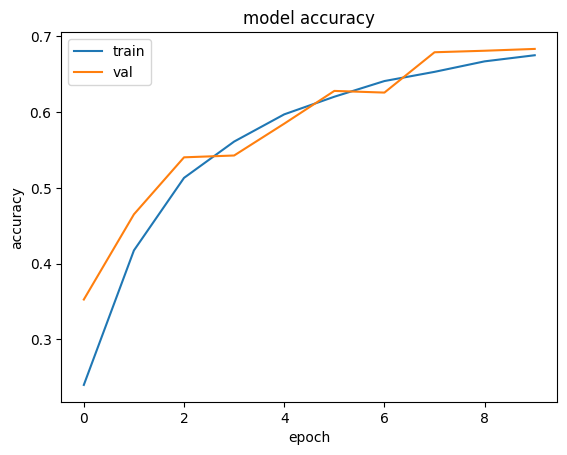

In [32]:
#5. 시각화
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.grid
plt.show()

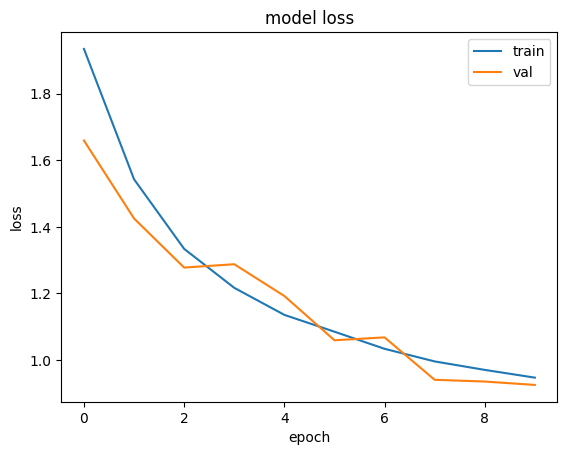

In [33]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.grid
plt.show()

# CIFAR 10 데이터 증강


###(2) loss=sparse_categorical_crossentropy
- optimizer='adam'
- batch size=256
- epoch=250

In [1]:
#1. 데이터로딩(케라스)
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [2]:
#2. 데이터 전처리
#이미지정규화(0~255 데이터를 0~1로 정규화)
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test : ",x_test.shape)
print("y_test",y_test.shape)

x_train :  (50000, 32, 32, 3)
y_train :  (50000, 1)
x_test :  (10000, 32, 32, 3)
y_test (10000, 1)


In [4]:
#2-1 데이터 증강
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

gen=ImageDataGenerator(rotation_range=20,
                       shear_range=0.2,
                       width_shift_range=0.2,
                       height_shift_range=0.2,
                       horizontal_flip=True)
#150%
augment_ratio=1.5
augment_size=int(x_train.shape[0]*augment_ratio)

randidx=np.random.randint(x_train.shape[0],size=augment_size)
#원본데이터 복사copy()
x_aug=x_train[randidx].copy()
y_aug=y_train[randidx].copy()

In [5]:
x_aug, y_aug = gen.flow(x_aug, y_aug,
                        batch_size=augment_size,
                        shuffle=False).next()

x_train=np.concatenate((x_train,x_aug))
y_train=np.concatenate((y_train,y_aug))


In [60]:
# 증강된 데이터를 학습데이터로 사용하고 정답 데이터를 랜덤하게 섞음
s=np.arange(x_train.shape[0])
np.random.shuffle(s)

x_train=x_train[s]
y_train=y_train[s]

In [61]:
#5-1. 컨볼류션 레이어 쌓기
cnn = Sequential()

cnn.add(Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3), activation='relu', padding='same'))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3), activation='relu', padding='same'))
cnn.add(Conv2D(64,(3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(256,(3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
#3차원 텐서를 1차원 벡터로 변환
cnn.add(Flatten())

cnn.add(Dense(128, activation='relu')) #은닉층
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))#출력층

In [62]:
#6 요약
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 dropout_17 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                      

## 모델 컴파일 및 모델 학습과 평가
###(1) loss='categorical_crossentropy', optimizer='rmsprop'

In [63]:
#1. 모델 컴파일(categorical_crossentropy)
cnn.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
#2. 모델학습
from keras.callbacks import ModelCheckpoint

checkpoint= ModelCheckpoint(filepath='cnn.weights.best.hdf5',
                            vervose =1,
                            save_best_only=True)
hist2 = cnn.fit(x_train, y_train,
                 batch_size=256,
                 epochs=250,
                 validation_data=(x_val, y_val))

In [ ]:
#3. 최상 val_acc
cnn.load_weights('model.weights_CNN_agumented.best.hdf5')

In [ ]:
#4. 모델평가
score = cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.9425334930419922
Test accuracy: 0.6743000149726868


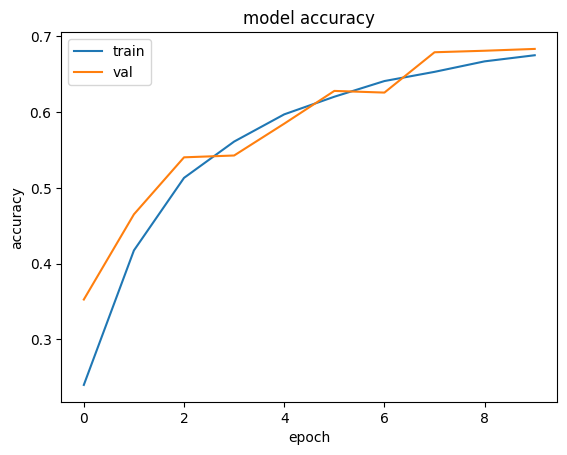

In [ ]:
#5. 시각화
import matplotlib.pyplot as plt

plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Data Augmention Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.grid
plt.show()

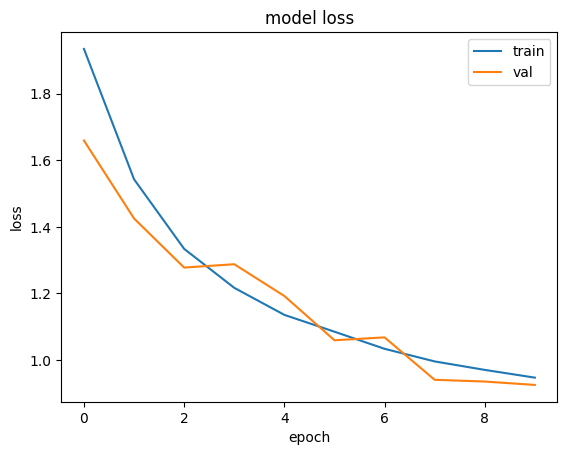

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Data Augmention Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.grid
plt.show()

In [41]:
#1. 모델 컴파일(categorical_crossentropy)
cnn=Sequential()

cnn.compile(loss='spare_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
#2. 모델학습
from keras.callbacks import ModelCheckpoint

checkpoint= ModelCheckpoint(filepath='cnn.weights.spara_categorical.hdf5',
                            vervose =1,
                            save_best_only=True)
hist2 = cnn.fit(x_train, y_train,
                 batch_size=256,
                 epochs=250,
                 validation_data=(x_val, y_val),
                 callbacks=[checkpoint],
                 verbose=2,
                 shuffle=True)

Epoch 1/250


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 252, in __call__
        self.build(y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 194, in build
        self._losses = tf.nest.map_structure(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 365, in _get_loss_object
        loss = losses_mod.get(loss)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2965, in get
        return deserialize(identifier, use_legacy_format=use_legacy_format)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2912, in deserialize
        return legacy_serialization.deserialize_keras_object(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/saving/legacy/serialization.py", line 537, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'spare_categorical_crossentropy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.




> CNN 모델이 정확도는 높고, 오버피팅도 거의 발생하지 않는 모델
> CNN 모델은 2개의 컨볼루션 레이어와 1개의 폴링 레이어 : 70.55%


> **오버피팅 점점 증가**
# ImageDatGenerator을 이용해 변화
- 7개의 컨볼루션레이어
- 5개 폴링 레이어
## 더 높은 레이어를 쌓아보면?




# CIFAR10 CNN(sklearn)

In [11]:
#1. 라이브러리

import numpy as np
from scipy import misc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import cv2
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as matimage
%matplotlib inline

In [ ]:
#2. 데이터 로딩 및 분리

train = pd.read_csv('fashion_dataset/train.csv')
test = pd.read_csv('fashion_dataset/test.csv')

X_train = np.array(train.iloc[:, 1:])
y_train = np.array(train.iloc[:, 0])
X_test =  np.array(test.iloc[:, 1:])
y_test = np.array(test.iloc[:, 0])
train.shape

In [ ]:
#2-1. 데이터 확인

n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

In [ ]:
#3. 데이터 전처리

from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
#3-1 데이터 Normalized 확인

n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

In [ ]:
#3-2 고유벡터, 고유값, 공분산 행렬 계산

mean_vec = np.mean(X_train, axis=0)
cov_mat = np.cov(X_train.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("Shape of Covariance matrix", cov_mat.shape)
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse=True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [ ]:
#3-3 앞에서 400개 성분 평균 분산
add =0.0
for i in range(400):
    add+= var_exp[i]

print('first 400 components average variance: %.2f' % add)

In [ ]:
#4. 차원축소(PCA)

from sklearn.decomposition import PCA

n_components = 400
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [ ]:
#4-1 이미지 확인
eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca.components_
print("Eigenvalues shape:", eigenvalues.shape)

n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(eigenvalues[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

##Classification

In [ ]:
#1. classification

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [ ]:
#2. Gaussioan classifier
gNB = GaussianNB()
gNB.fit(X_train_pca,y_train)
nb_predict = gNB.predict(X_test_pca)

print(metrics.classification_report(y_test, nb_predict))
accuracy = metrics.accuracy_score(y_test, nb_predict)
average_accuracy = np.mean(y_test == nb_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

In [ ]:
#3. SVM classifier
svm = SVC()
svm.fit(X_train_pca,y_train)
svm_predict = svm.predict(X_test_pca)

print(metrics.classification_report(y_test, svm_predict))
accuracy = metrics.accuracy_score(y_test, svm_predict)
average_accuracy = np.mean(y_test == svm_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

In [ ]:
#4. MLP classifier
MLP= MLPClassifier()
MLP.fit(X_train_pca,y_train)
mlp_predict = MLP.predict(X_test_pca)

print(metrics.classification_report(y_test, mlp_predict))
accuracy = metrics.accuracy_score(y_test, mlp_predict)
average_accuracy = np.mean(y_test == mlp_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

## 2진화 처리


In [ ]:
#1. 2진화 처리
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()
train_binary = binarizer.fit_transform(X_train)
test_binary = binarizer.fit_transform(X_test)
train_binary.shape

In [ ]:
#1-1 이미지출력
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(train_binary[i,:].reshape(28,28), cmap="binary")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

In [ ]:
#2. Gaussioan classifier
gNB = GaussianNB()
gNB.fit(train_binary,y_train)
nb_predict = gNB.predict(test_binary)

print(metrics.classification_report(y_test, nb_predict))
accuracy = metrics.accuracy_score(y_test, nb_predict)
average_accuracy = np.mean(y_test == nb_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

In [ ]:
#3. SVM
svm = SVC()
svm.fit(train_binary,y_train)
svm_predict = svm.predict(test_binary)

print(metrics.classification_report(y_test, svm_predict))
accuracy = metrics.accuracy_score(y_test, svm_predict)
average_accuracy = np.mean(y_test == svm_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

In [ ]:
# MLP
# 하나의 레이어와 100개의 뉴런 사용
MLP= MLPClassifier()
MLP.fit(train_binary,y_train)
mlp_predict = MLP.predict(test_binary)

print(metrics.classification_report(y_test, mlp_predict))
accuracy = metrics.accuracy_score(y_test, mlp_predict)
average_accuracy = np.mean(y_test == mlp_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

In [21]:
#1. 전처리

from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [22]:
#1-1 데이터셋 분리
# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [23]:
#1-2. 스케일링 및 형변환
def get_preprocessed_data(images, labels):
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형.
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)

    return images, labels

In [26]:
#1-3 원핫인코딩
# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용
    oh_labels = to_categorical(labels)
    return images, oh_labels

In [25]:
#학습,검증 데이터 분리
# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용.
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)

    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels )

In [ ]:
#1-5. 데이터 분리(학습/검증)
# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성.

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)